In [24]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import random

In [7]:
class arms:
    def __init__(me,delta,T):
        me.arm1=random.normal(loc=0, scale=1, size=T)
        me.arm2=random.normal(loc=delta, scale=1, size=T)
        
    def getarms(me):
        return [me.arm1,me.arm2]
    def getrew(me, it):
        return [me.arm1[it],me.arm2[it]]

In [8]:
class armsnew:
    def __init__(me,scalea,delta=0.1,T=1000):
        me.arm1=random.normal(loc=0, scale=scalea, size=T)
        me.arm2=random.normal(loc=delta, scale=scalea, size=T)
        
    def getarms(me):
        return [me.arm1,me.arm2]
    def getrew(me, it):
        return [me.arm1[it],me.arm2[it]]

In [17]:
class bandits:
    def __init__(me):
        me.mean1=0
        me.count1=0
        me.mean2=0
        me.count2=0
    
    def update(me,reward,arm):
        if arm==1:
            updt= me.mean1*me.count1+reward
            me.count1+=1
            me.mean1=updt/me.count1
        elif arm==2: 
            updt= me.mean1*me.count2+reward
            me.count2+=1
            me.mean2=updt/me.count2
        else:
            pass
            
    def fullupdate(me,rewardvec):
        me.update(rewardvec[0],1)
        me.udpdate(rewardvec[1],2)
        
    def returnarm(me):
        return me.mean1, me.mean2

In [43]:
def optimalGETC(T,delta):
    answer=4/(delta**2)*math.log(T*delta**2/4)
    answer=math.ceil(answer)
    return answer

In [44]:
optimalGETC(1000,0.1) 

367

In [259]:
def GETC(delta,T=1000):
    reward=0
    reward1=0
    reward2=0
    arm=arms(delta,T)
    known_bandits=bandits()
    full_bandits=bandits()
    m=optimalGETC(T,delta)
    chk=0
    reg=[]
    for t in range(T):
        rewvec=arm.getrew(t)
        reward1+=rewvec[0]
        reward2+=rewvec[1]
#         full_bandits.fullupdate(rewvec)
        if t<=2*m:#m multiplied by number of arms
            i=t%2+1
            reward+=rewvec[i-1]
            known_bandits.update(rewvec[i-1],i)
            regret=np.amax([reward1,reward2]) -reward
            reg.append(regret)
        else:#t>mK
            if chk==0:
                i=np.argmax(known_bandits.returnarm())+1
                chk=1
            #print(i)
            reward+=rewvec[i-1]
            known_bandits.update(rewvec[i-1],i)
            regret=np.amax([reward1,reward2]) -reward
            reg.append(regret)
    print(i) 
    
    print(known_bandits.returnarm())
    print([reward1,reward2,reward])
    regret=np.amax([reward1,reward2]) -reward
    return regret
            
        
        
        
    

In [21]:
def GETC0(arms,T=1000,T_o=367):
    reward=0
    reward1=0
    reward2=0
    arm=arms
    known_bandits=bandits()
    full_bandits=bandits()
    m=T_o/2
    chk=0
    reg=[]
    for t in range(T):
        rewvec=arm.getrew(t)
        reward1+=rewvec[0]
        reward2+=rewvec[1]
#         full_bandits.fullupdate(rewvec)
        if t<=2*m:#m multiplied by number of arms
            i=t%2+1
            reward+=rewvec[i-1]
            known_bandits.update(rewvec[i-1],i)
            regret=np.amax([reward1,reward2]) -reward
            reg.append(regret)
        else:#t>mK
            if chk==0:
                i=np.argmax(known_bandits.returnarm())+1
                chk=1
            #print(i)
            reward+=rewvec[i-1]
            known_bandits.update(rewvec[i-1],i)
            regret=np.amax([reward1,reward2]) -reward
            reg.append(regret)
#     print(i) 
#     print(known_bandits.returnarm())
#     print([reward1,reward2,reward])
#     regret=np.amax([reward1,reward2]) -reward
    return reg
            
        
        
        
    

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:45<00:00, 10.56s/it]


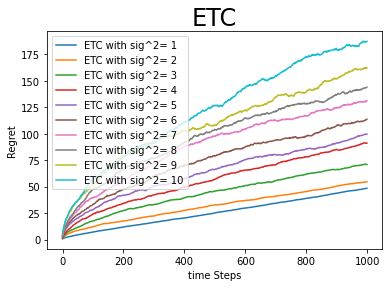

In [46]:
from tqdm import tqdm

for i in tqdm(range(1,11)):
    see=np.array([0.0 for i in range(1000)])
    for j in range (1000):
        arma=armsnew(i)
        see+=np.array(GETC0(arma,1000,i*optimalGETC(0.1,1000)))
    see=see/1000
    plt.plot(see,label='ETC with sig^2= '+str(i))
# plt.label(loc='best')
plt.title('ETC',fontsize=24)
plt.xlabel("time Steps")
plt.ylabel('Regret')
plt.legend(loc='best')
plt.show()

In [261]:
for i in tqdm(range(100):
            plt.plt(see[i])

[50.24575865166875,
 46.63976989526375,
 47.18943864640663,
 47.31166198437867,
 46.81896788990804,
 47.080533107232206,
 47.54856189214208,
 45.647471395514934,
 47.10254789942508,
 47.126100617828904,
 46.932142046869075,
 46.698927895063605,
 47.44419946001051,
 45.95156377789826,
 47.96636391231749,
 46.073450608787695,
 47.50429880135099,
 46.89333323457356,
 46.707466429697014,
 46.1884407310963,
 47.184355221901264,
 45.95401672495229,
 46.7851842391839,
 46.05606562576576,
 46.54813020295233,
 46.06919435815543,
 46.353423978716286,
 47.01265626729444,
 46.41971001805441,
 44.69315170817935,
 48.19225377876363,
 47.84232118872024,
 47.560987502987864,
 47.21030531718487,
 46.86388924666667,
 47.07044147394597,
 46.446786971809345,
 46.40001795852128,
 48.06209458490681,
 46.084895500510584,
 47.05303990926351,
 46.61453398687121,
 47.06729417709034,
 46.376197986319745,
 47.1137539202748,
 46.72192022420774,
 47.49251921089863,
 45.801751188940514,
 46.99049505327237,
 46.74537

In [176]:
import pickle
filename = 'median'
outfile = open(filename,'wb')
pickle.dump(median,outfile)
outfile.close()

In [37]:
import pickle
file = open("median",'rb')

median=pickle.load(file)

In [26]:
# print(median)

In [38]:
file1 = open("maxi",'rb')
file2 = open("mini",'rb')
maxi=pickle.load(file1)
mini=pickle.load(file2)


In [17]:
medico=[0 for i in range(1000)]
medico[0]=median[0]
medico[999]=median[999]
for j in range(1,999):
    medico[j]=2/3*(median[j])+(median[j-1]+median[j+1])/6
for j in range(1,999):
    medico[j]=2/3*(medico[j])+(medico[j-1]+medico[j+1])/6

In [248]:
for t in range(1000):
    for j in range(1,999):
        medico[j]=2/3*(medico[j])+(medico[j-1]+medico[j+1])/6

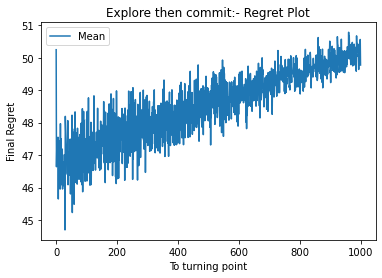

In [265]:
import matplotlib.pyplot as plt
eta1=0
plt.plot(median,label='Mean')
# plt.plot(maxi,label='FTPL with eta='+str(eta1*10))
# plt.plot(mini,label='FTPL with eta='+str(eta1*100))
# plt.plot(p4_r,label='FTPL with eta='+str(eta1/10))
# plt.plot(p5_r,label='FTPL with eta='+str(eta1/100))
plt.title("Explore then commit:- Regret Plot")
plt.xlabel('To turning point')
plt.ylabel('Final Regret')

plt.legend(loc='best')
plt.show()

In [266]:
len(median)

1000

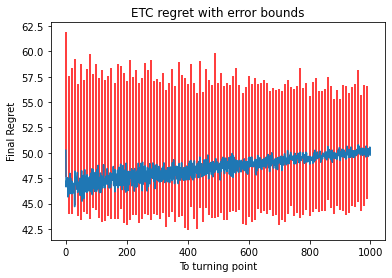

In [40]:
import numpy as np
x = np.array(range(1000))
yerr=[]
errmax=[0 for i in range(1000)]
errmin=[0 for i in range(1000)]
for i in range(1000):
    if i%10==0:
        yerr.append([median[i] - mini[i], maxi[i] - median[i]]) 
    else:
        yerr.append([0,0])
#         errmax[i]= maxi[i]
#         errmin[i]=mini[i]
# plt.plot(errmin)
yerr = np.transpose(yerr)
plt.errorbar( x, median, yerr/20, ecolor=['red'], )
# plt.show()
plt.xlabel('To turning point')
plt.ylabel('Final Regret')
plt.title("ETC regret with error bounds")
# plt.legend(loc='best')
plt.show()

In [134]:
ban.update(2,1)

In [62]:
ban.update(1,2)

In [139]:
ban.returnarm()

(1.8805970149253732, 1.0)